# XAI3 - Model Agnostic Methods

In [2]:
# install.packages("randomForest")
# install.packages('reshape2')
# install.packages('plotly')
# install.packages('dplyr')
# install.packages("pdp")

library(randomForest)
library(reshape2)
library(plotly)
library(dplyr)
library(pdp)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.

Loading required package: ggplot2


Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin



Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout



Attaching package: 'dplyr'


The following object is masked from 'package:randomForest':

    combine


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [3]:
#it's not mentioned if we should use hour or day so I used day
data_bikes = read.csv2('day.csv',sep=',')

data_bikes$spring = ifelse(data_bikes$season == 2, 1, 0)
data_bikes$summer = ifelse(data_bikes$season == 3, 1, 0)
data_bikes$fall = ifelse(data_bikes$season == 4, 1, 0)

data_bikes$misty = ifelse(data_bikes$weathersit == 2, 1, 0)
data_bikes$rain = ifelse(data_bikes$weathersit %in% c(3, 4), 1, 0)


data_bikes$temp = (as.numeric(data_bikes$temp) * 47) - 8
data_bikes$hum = as.numeric(data_bikes$hum)*100
data_bikes$windspeed = as.numeric(data_bikes$windspeed) * 67

data_bikes$days_since_2011 = as.numeric(as.Date(data_bikes$dteday) - as.Date('2011-01-01'))

model_data = data_bikes[, c( "fall", "spring", "summer", "workingday", "holiday", "misty", "rain", "temp", "hum", "windspeed", "days_since_2011")]


In [4]:
model = randomForest(data_bikes$cnt ~ ., data=model_data)

# Partial Dependency Plot

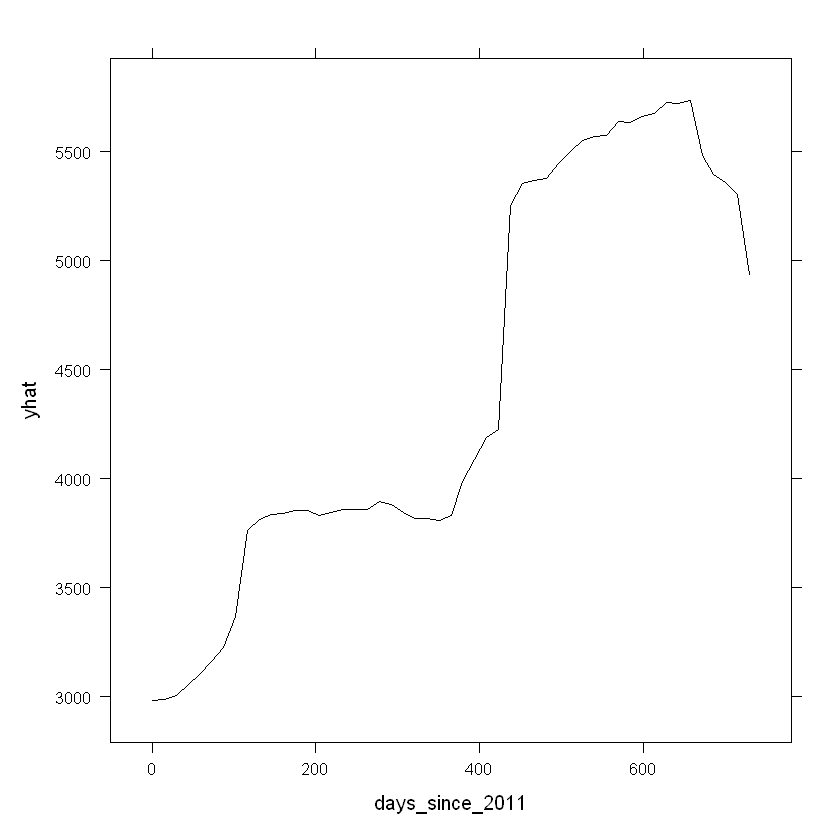

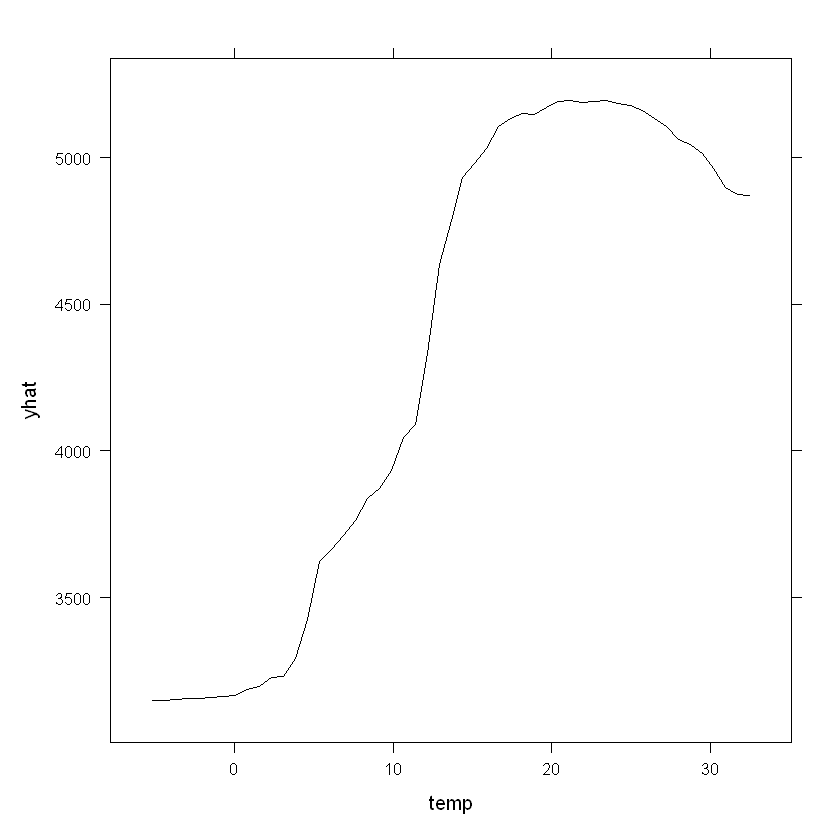

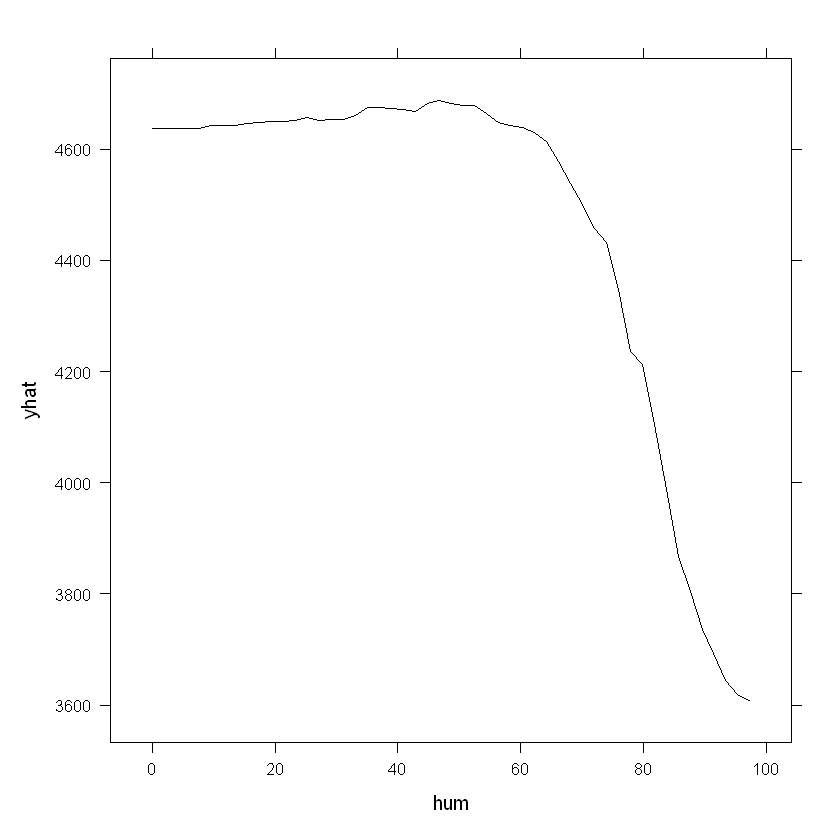

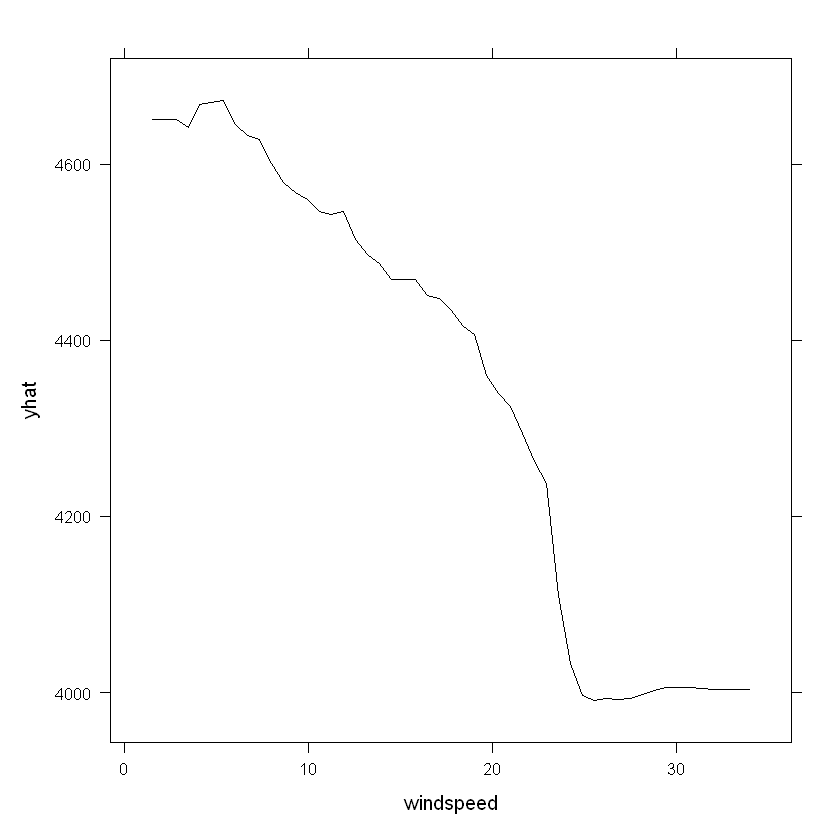

In [5]:
partial(model, pred.var = "days_since_2011", plot = TRUE)

partial(model, pred.var = "temp", plot = TRUE)

partial(model, pred.var = "hum", plot = TRUE)

partial(model, pred.var = "windspeed", plot = TRUE)

# 2D  Partial Dependency Plot

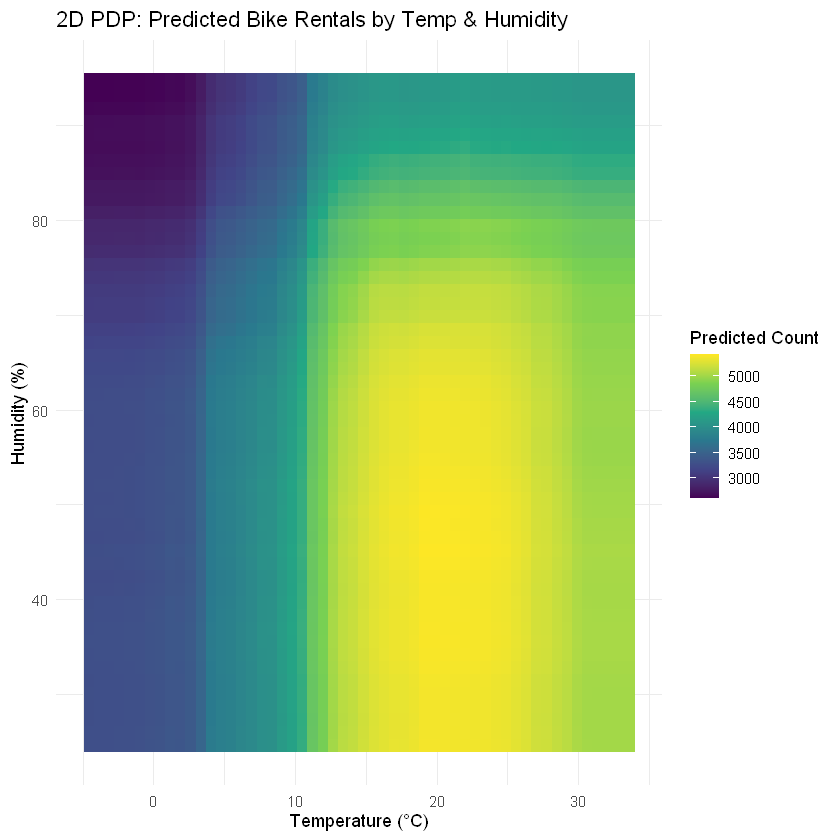

In [6]:
set.seed(42)
sampled_data = model_data[sample(nrow(model_data), 200), ]

pdp_2d = partial(model,
                 pred.var = c("temp", "hum"),
                 train = sampled_data,
                 progress = "text")

ggplot(pdp_2d, aes(x = temp, y = hum, fill = yhat)) +
  geom_tile(width = 3, height = 3) +
  scale_fill_viridis_c() +
  labs(title = "2D PDP: Predicted Bike Rentals by Temp & Humidity",
       x = "Temperature (°C)", y = "Humidity (%)", fill = "Predicted Count") +
  theme_minimal()

# PDP to explain price of a house

In [7]:
data_houses = read.csv2('kc_house_data.csv',sep=',')

data_houses$price = as.numeric(data_houses$price)
data_houses$floors = as.numeric(as.character(data_houses$floors))
data_houses$bathrooms = as.numeric(as.character(data_houses$bathrooms))


model_data_houses = data_houses[,c("price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","yr_built")]



model_houses = randomForest(price ~ . , data = model_data_houses)

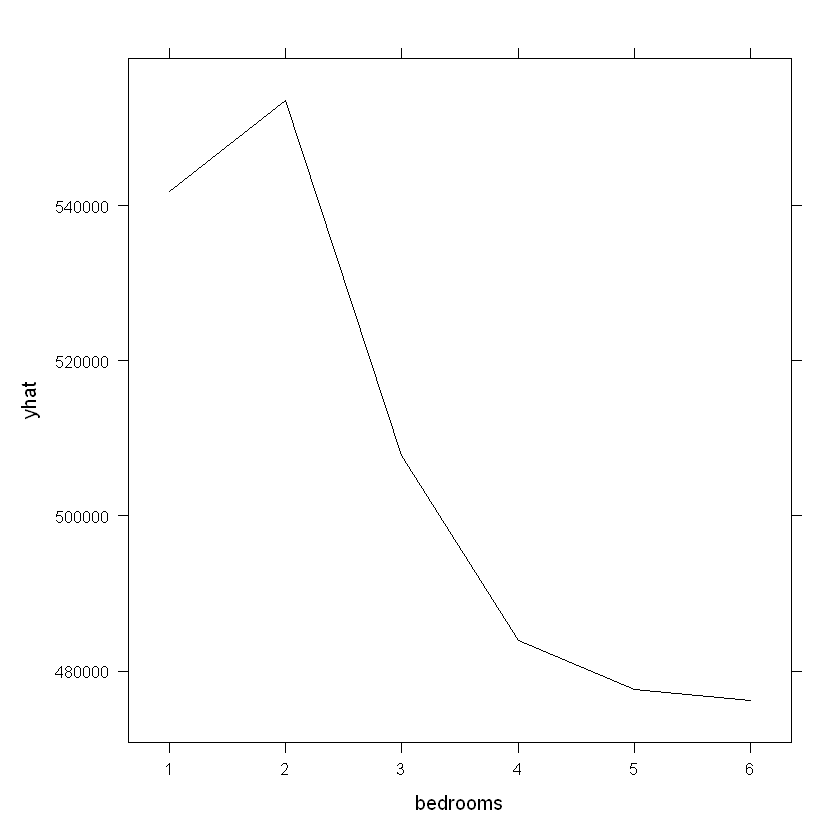

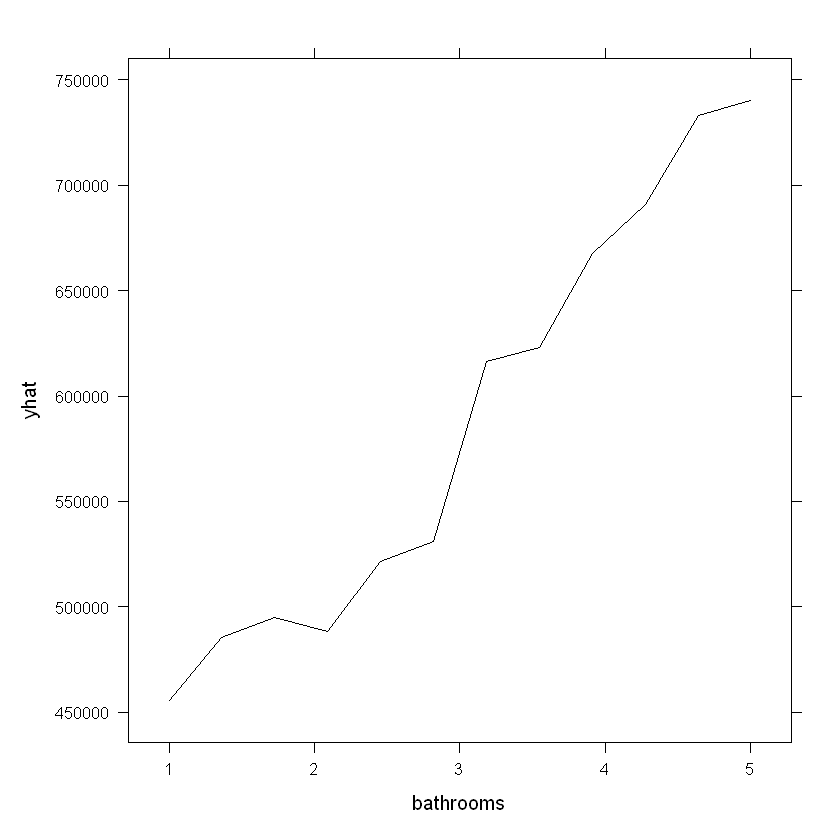

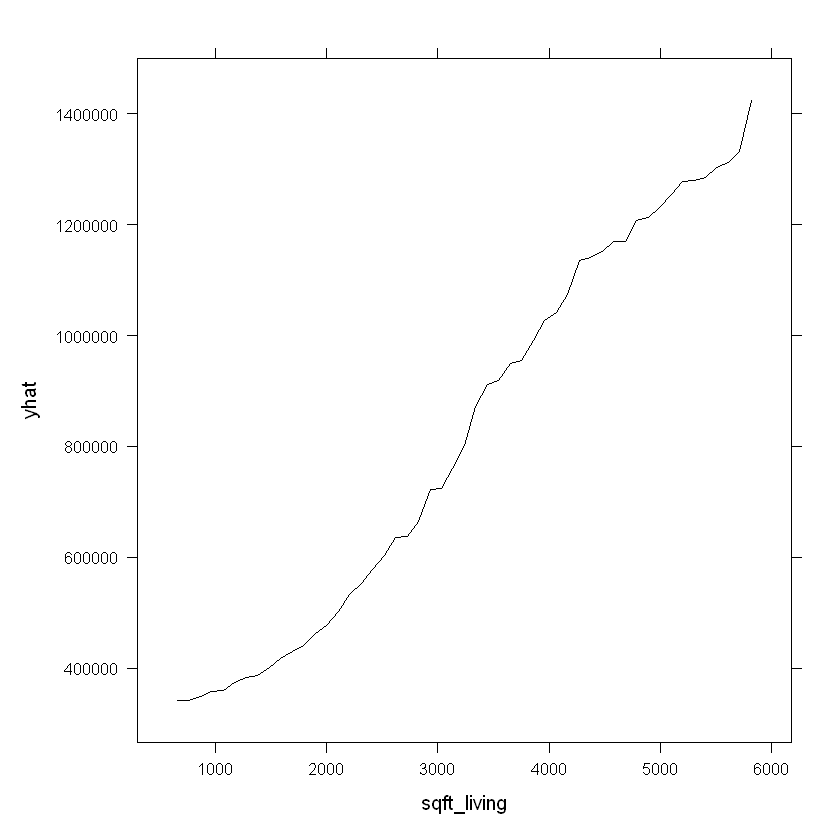

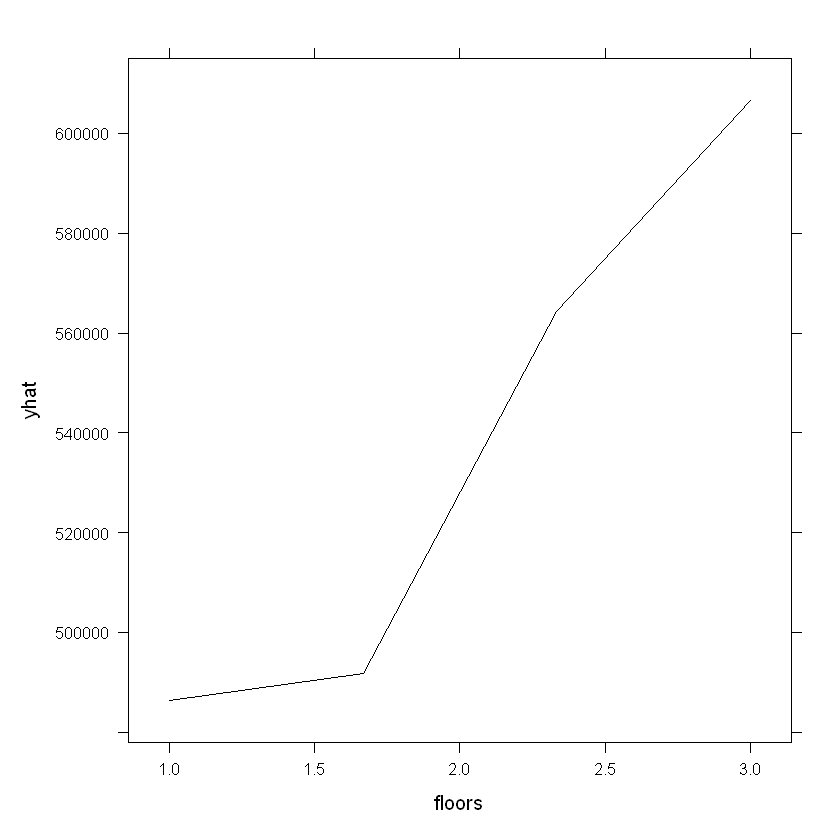

In [8]:
sampled_data_houses = model_data_houses[sample(nrow(model_data_houses), 200), ]

partial(model_houses, pred.var = "bedrooms", train = sampled_data_houses, plot = TRUE)

partial(model_houses, pred.var = "bathrooms", train = sampled_data_houses, plot = TRUE)

partial(model_houses, pred.var = "sqft_living", train = sampled_data_houses, plot = TRUE)

partial(model_houses, pred.var = "floors", train = sampled_data_houses, plot = TRUE)
